In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras import callbacks

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'data/Train', str(i))
#     print(path)
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            
data = np.array(data)
labels = np.array(labels)



In [4]:
print(data.shape)
print (labels.shape)

(39209, 30, 30, 3)
(39209,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
print(y_train[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# Build a CNN model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [9]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Train and validate the model

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=0.2)

Epoch 1/15
785/785 [==============================] - 54s 67ms/step - loss: 2.1882 - accuracy: 0.4653 - val_loss: 0.5926 - val_accuracy: 0.8604
Epoch 2/15
785/785 [==============================] - 53s 67ms/step - loss: 0.7583 - accuracy: 0.7811 - val_loss: 0.2336 - val_accuracy: 0.9413
Epoch 3/15
785/785 [==============================] - 53s 67ms/step - loss: 0.4730 - accuracy: 0.8633 - val_loss: 0.1567 - val_accuracy: 0.9582
Epoch 4/15
785/785 [==============================] - 53s 67ms/step - loss: 0.3630 - accuracy: 0.8955 - val_loss: 0.1178 - val_accuracy: 0.9676
Epoch 5/15
785/785 [==============================] - 53s 67ms/step - loss: 0.2947 - accuracy: 0.9160 - val_loss: 0.0913 - val_accuracy: 0.9750
Epoch 6/15
785/785 [==============================] - 53s 67ms/step - loss: 0.2789 - accuracy: 0.9213 - val_loss: 0.1012 - val_accuracy: 0.9707
Epoch 7/15
785/785 [==============================] - 53s 68ms/step - loss: 0.2628 - accuracy: 0.9286 - val_loss: 0.0895 - val_accuracy:

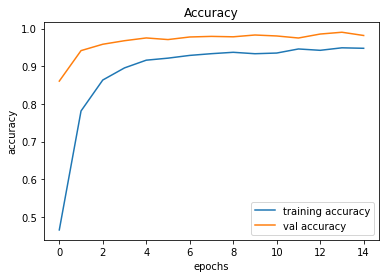

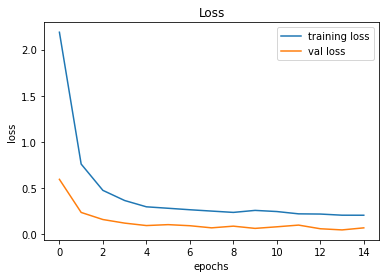

In [11]:
# Plot accuracy and loss

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [12]:
y_test = pd.read_csv('data/Test.csv')

labels = y_test['ClassId'].values
imgs = y_test['Path'].values
data=[]
for img in imgs:
    path = 'data/'+img
    image = Image.open(path)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)
# pred = model.predict_classes(X_test) - depricated

pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(labels, pred)

0.9470308788598575

In [13]:
model.save('traffic_classifier.h5')